In [100]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [101]:
torch.__version__

'2.8.0+cu126'

In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###Let's create our synthetic dataset

In [103]:
start = 0
end = 1
step = 0.01
noise_factor = 0.1

weight = 0.8
bias = 0.2

torch.manual_seed(0)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias + noise_factor*torch.rand(X.shape)

In [104]:
len(X), len(y)

(100, 100)

###Let's visualize the dataset we created

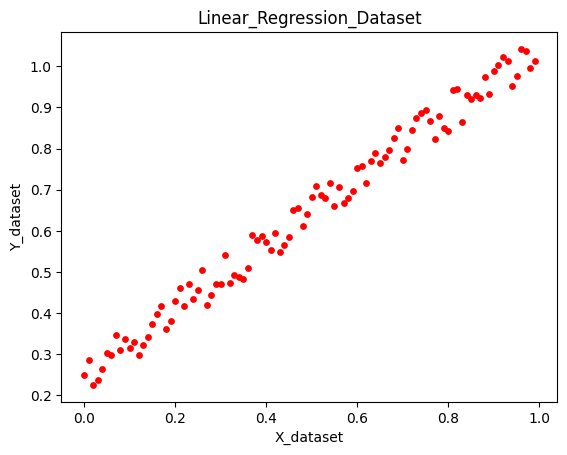

In [105]:
plt.scatter(X,y,s=15,c='r',label='Dataset')
plt.xlabel("X_dataset")
plt.ylabel("Y_dataset")
plt.title("Linear_Regression_Dataset")
plt.show()

###Let's split the dataset into train and test

In [106]:
indices = torch.randperm(100)
split_size = 0.8

X_train, y_train = X[:int(split_size*len(X))], y[:int(split_size*len(X))]
X_test, y_test = X[int(split_size*len(X)):], y[int(split_size*len(X)):]


len(X_train), len(y_train) , len(X_test) , len(y_test)

(80, 80, 20, 20)

###Let's create a function for visualizing data

In [107]:
def plot_data(train_X = X_train,
              train_y = y_train,
              test_X = X_test,
              test_y = y_test,
              predictions = None):

  plt.scatter(train_X,train_y,s=15,c='r',label='TRAINING_DATA')
  plt.scatter(test_X,test_y,s=15,c='g',label='TEST_DATA')
  plt.xlabel("X_dataset")
  plt.ylabel("Y_dataset")
  plt.title("Linear_Regression_Dataset")

  if predictions is not None:
    plt.scatter(test_X,predictions,c='b',s=15,label="Predictions")

  plt.legend(prop={"size":15})
  plt.show()


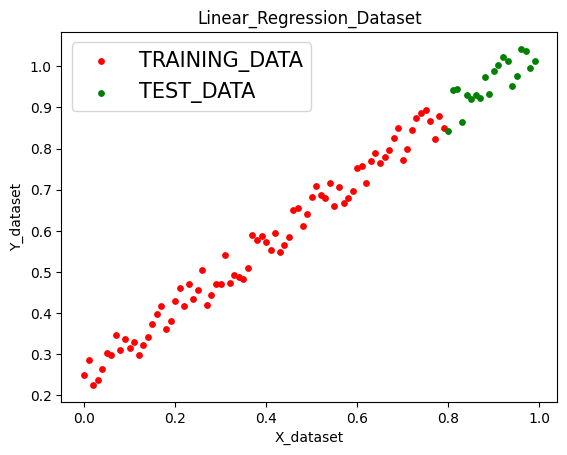

In [108]:
plot_data()

###LET'S BUILD THE MODEL

In [109]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self,X:torch.Tensor)->torch.Tensor:
    return self.linear_layer(X)

###Let's instantiate a model

In [110]:
torch.manual_seed(100)
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.7767]])),
             ('linear_layer.bias', tensor([0.6317]))])

In [111]:
model_0.parameters()

<generator object Module.parameters at 0x7bfeb8110ba0>

###LET'S TRAIN OUR MODEL

In [112]:
paramtrs = model_0.parameters()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = paramtrs,
                            lr=0.01)


EPOCHES = 1200
epoch_count = []
train_losses = []
test_losses = []


for epoch in range(EPOCHES):

  model_0.train()
  y_pred = model_0(X_train)
  train_loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_0.eval() #This turns of Dropout and Batch
  with torch.inference_mode(): #This mainly turns off gradient tracking
    y_p = model_0(X_test)
    test_loss = loss_fn(y_p, y_test)

  if epoch%100==0:
    epoch_count.append(epoch)
    test_losses.append(test_loss.item())
    train_losses.append(train_loss.item())
    print(f"Epoch: {epoch} | Train_Loss: {train_loss} | Test_loss: {test_loss}")



Epoch: 0 | Train_Loss: 0.3628990054130554 | Test_loss: 1.019290566444397
Epoch: 100 | Train_Loss: 0.2692945897579193 | Test_loss: 0.6543084979057312
Epoch: 200 | Train_Loss: 0.23474547266960144 | Test_loss: 0.5548393130302429
Epoch: 300 | Train_Loss: 0.20110957324504852 | Test_loss: 0.46639251708984375
Epoch: 400 | Train_Loss: 0.16762804985046387 | Test_loss: 0.3810422420501709
Epoch: 500 | Train_Loss: 0.13456310331821442 | Test_loss: 0.3036608099937439
Epoch: 600 | Train_Loss: 0.10159124433994293 | Test_loss: 0.21624426543712616
Epoch: 700 | Train_Loss: 0.06951551139354706 | Test_loss: 0.13292117416858673
Epoch: 800 | Train_Loss: 0.04232393205165863 | Test_loss: 0.06936603784561157
Epoch: 900 | Train_Loss: 0.028781119734048843 | Test_loss: 0.03218719735741615
Epoch: 1000 | Train_Loss: 0.025191981345415115 | Test_loss: 0.027997812256217003
Epoch: 1100 | Train_Loss: 0.02474534511566162 | Test_loss: 0.02864360809326172


###Let's plot our train and test loss

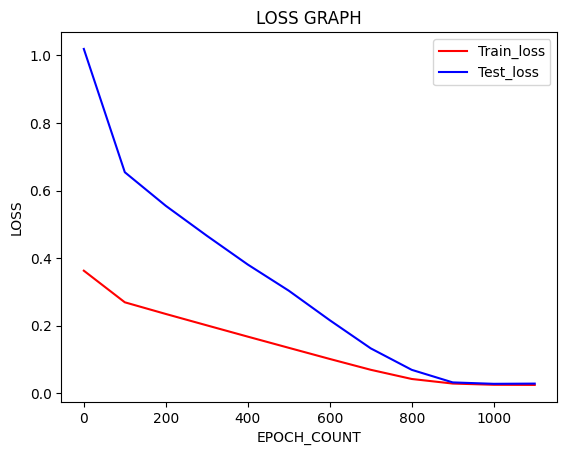

In [113]:
plt.plot(epoch_count,train_losses, c='r',label = "Train_loss")
plt.plot(epoch_count,test_losses, c='b',label = "Test_loss")

plt.xlabel("EPOCH_COUNT")
plt.ylabel("LOSS")
plt.title("LOSS GRAPH")
plt.legend()
plt.show()

###Let's plot the predictions on X_test

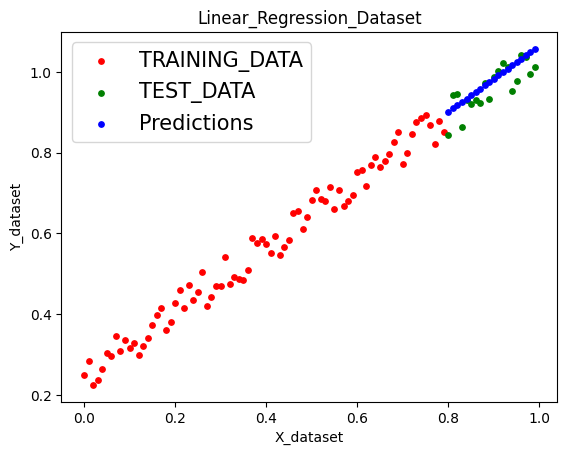

In [114]:
model_0.eval()
with torch.inference_mode():
  predictions = model_0(X_test)

plot_data(predictions= predictions)

###Let's save and load the model

In [117]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True,
                 exist_ok = True)

model_name = "linear_regression_pytorch.pth"

model_save_path = model_path/model_name

print(f"Saving model to {model_save_path}")
torch.save(obj = model_0.state_dict(),
           f = model_save_path)

Saving model to models/linear_regression_pytorch.pth


In [119]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [120]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8217]])),
             ('linear_layer.bias', tensor([0.2437]))])

In [122]:
#Let's evaluate the loaded model

loaded_model.eval()
with torch.inference_mode():
  loaded_model_predictions = loaded_model(X_test)

loaded_model_predictions == predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

**That's conclude the implementation of LINEAR REGRESSION USING PYTORCH**